# Parcial Final de Métodos Computacionales

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize as spo
import warnings

# Primera parte

In [ ]:
url = "https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/DataRotacion.csv"
DataFrame = pd.read_csv(url,sep=",",engine='python')

In [ ]:
DataFrame30 = DataFrame[DataFrame["angle"]==30.]

In [ ]:
h=np.array(DataFrame30["h"])
angle=np.array(DataFrame30["angle"])
y = np.array(DataFrame30["y"])
sigmay = np.array(DataFrame30["sigmay"])

In [ ]:
def GetModel(h,w,angle,g):
  return (2*np.sqrt(2)/3)*w*np.cos(angle*np.pi/180)*np.sqrt(h**3/g)

In [ ]:
def Chi2(p,h, y, sigmay, g,angle):
  return np.sum((y-GetModel(h,p,angle,g))**2 / (2*sigmay**2))

In [ ]:
p0 = np.ones(1)
nll = lambda *p: Chi2(*p)

In [ ]:
result = spo.minimize(nll,p0,args =(h,y,sigmay,9.81,30.0),options={"disp":True})

Optimization terminated successfully.
         Current function value: 1.145718
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4


In [ ]:
result.x

array([7.24399804e-05])

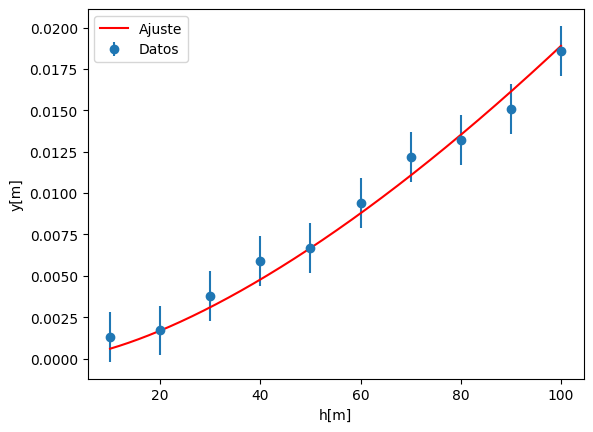

In [ ]:
plt.errorbar(h, y, yerr=sigmay, fmt='o', label='Datos')

h_fit = np.linspace(min(h), max(h), 1000)
y_fit = GetModel(h_fit, result.x, angle=30.0, g=9.8)
plt.plot(h_fit, y_fit, label='Ajuste',color="red")

plt.xlabel('h[m]')
plt.ylabel('y[m]')
plt.legend()
plt.show()

# Segunda Parte

In [ ]:
def GetData(h,y,sigmay,lambda_):
  N = 300
  Gravedad = np.zeros(N)
  Omega = np.zeros(N)
  for i in range(300):
    y_modificado = y + np.random.normal(loc=0, scale=sigmay[0], size=len(y))
    Gravedad[i] = 9.81 + np.random.normal(loc=0,scale=1)
    result = spo.minimize(nll,p0,args =(h,y_modificado,sigmay,Gravedad[i],lambda_))
    Omega[i] = result.x[0]
  return Gravedad, Omega

In [ ]:
Gravedad, Omega = GetData(h,y,sigmay,30.0)

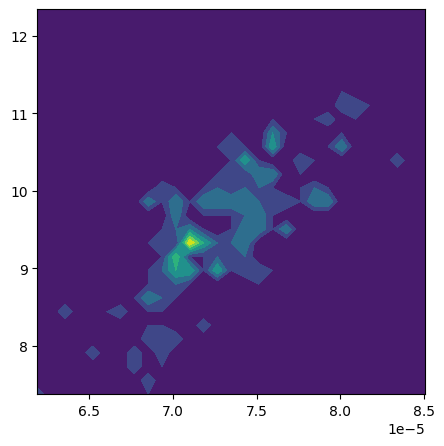

In [ ]:
num_binsx = 29
num_binsy = 29

H2, binsx, binsy = np.histogram2d(Omega, Gravedad, bins=(num_binsx, num_binsy))

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot()
ax.contourf(binsx[1:],binsy[1:],H2)

In [ ]:
np.corrcoef(Omega, Gravedad)[0, 1] #Coeficiente de correlación de Pearson

0.729215380613038

Se puede notar que las variables están correlacionadas porque hay áreas más densas o concentradas en ciertas regiones del gráfico. Además, calculando el coeficiente de correlación de Pearson es posible concluir que las variables están correlacianas al tener un valor cercano a 1

In [ ]:
binsx

array([6.10599153e-05, 6.18880749e-05, 6.27162346e-05, 6.35443942e-05,
       6.43725538e-05, 6.52007134e-05, 6.60288730e-05, 6.68570327e-05,
       6.76851923e-05, 6.85133519e-05, 6.93415115e-05, 7.01696712e-05,
       7.09978308e-05, 7.18259904e-05, 7.26541500e-05, 7.34823096e-05,
       7.43104693e-05, 7.51386289e-05, 7.59667885e-05, 7.67949481e-05,
       7.76231077e-05, 7.84512674e-05, 7.92794270e-05, 8.01075866e-05,
       8.09357462e-05, 8.17639058e-05, 8.25920655e-05, 8.34202251e-05,
       8.42483847e-05, 8.50765443e-05])

In [ ]:
H1 = np.sum(H2,axis=1)

In [ ]:
H1

array([ 3.,  4.,  4.,  7.,  9.,  7.,  9., 11.,  9., 25., 16., 25., 20.,
       13., 35., 19., 14., 16., 15.,  9.,  8.,  7.,  5.,  0.,  3.,  2.,
        0.,  2.,  3.])

In [ ]:
cs = np.cumsum(H1)

In [ ]:
cs

array([  3.,   7.,  11.,  18.,  27.,  34.,  43.,  54.,  63.,  88., 104.,
       129., 149., 162., 197., 216., 230., 246., 261., 270., 278., 285.,
       290., 290., 293., 295., 295., 297., 300.])

In [ ]:
ij = np.searchsorted( cs, np.percentile(cs,16) )
ii = np.searchsorted( cs, np.percentile(cs,50) )
ji = np.searchsorted( cs, np.percentile(cs,84) )

In [ ]:
ij, ii, ji

(5, 14, 24)

In [ ]:
binsx[1:][ij],binsx[1:][ii],binsx[1:][ji]

(6.602887304882665e-05, 7.348230963664393e-05, 8.176390584532981e-05)

Creación de la tabla para cada lambda

In [ ]:
print("lambda","omega","intervalo","error_relativo")
lambda_ = [10.,20.,30.,40.,50.,60.,70.]

Omegas = []
errores = []

for i in lambda_:

  if i == 70.:
    h_new=np.array(DataFrame["h"])
    y_new = np.array(DataFrame["y"])
    sigmay_new = np.array(DataFrame["sigmay"])
    angle_new = np.array(DataFrame["angle"])

    Gravedad_new, Omega_new = GetData(h_new,y_new,sigmay_new,angle_new)
  
  else:

    DataFrame_new = DataFrame[DataFrame["angle"]==i]

    h_new=np.array(DataFrame_new["h"])
    y_new = np.array(DataFrame_new["y"])
    sigmay_new = np.array(DataFrame_new["sigmay"])

    Gravedad_new, Omega_new = GetData(h_new,y_new,sigmay_new,i)

  H2_new, binsx_new, binsy_new = np.histogram2d(Omega_new, Gravedad_new, bins=(num_binsx, num_binsy))

  H1_new = np.sum(H2_new,axis=1)
  cs_new = np.cumsum(H1_new)

  ij_new = np.searchsorted( cs_new, np.percentile(cs_new,16) )
  ii_new = np.searchsorted( cs_new, np.percentile(cs_new,50) )
  ji_new = np.searchsorted( cs_new, np.percentile(cs_new,84) )

  Omega_sort_new = np.sort(Omega_new)

  #values = [ Omega_sort_new[int(cs_new[ij_new])], Omega_sort_new[int(cs_new[ii_new])], Omega_sort_new[int(cs_new[ji_new])] ]
  values = [binsx_new[1:][ij_new],binsx_new[1:][ii_new],binsx_new[1:][ji_new]]

  if i == 70.:
    print( "combined" ,values[1], [values[0],values[2]], abs(7.27e-5 - values[1])/7.27e-5)
  else:
    print( i ,values[1], [values[0],values[2]], abs(7.27e-5 - values[1])/7.27e-5)

  errores.append(binsx_new[1:][ji_new]*0.5-binsx_new[1:][ij_new]*0.5)
  Omegas.append(values[1])

lambda omega intervalo error_relativo
10.0 6.974334278884065e-05 [6.216885813545196e-05, 7.815943684816139e-05] 0.040669287636304785
20.0 7.135476011770178e-05 [6.301563664487751e-05, 8.06204528652843e-05] 0.018503987376866905
30.0 7.348622325559249e-05 [6.565840556398116e-05, 8.218379846849394e-05] 0.010814625248864953
40.0 7.557971281066832e-05 [6.691523739404918e-05, 8.520690771802292e-05] 0.03961090523615291
50.0 7.013350781799809e-05 [6.0737045369745895e-05, 8.057402164938941e-05] 0.035302505942254696
60.0 7.587483793023155e-05 [6.390616632893994e-05, 8.917336193166667e-05] 0.04367039793991117
combined 7.195915390854619e-05 [6.495771616719686e-05, 7.973852917671215e-05] 0.01019045517818174


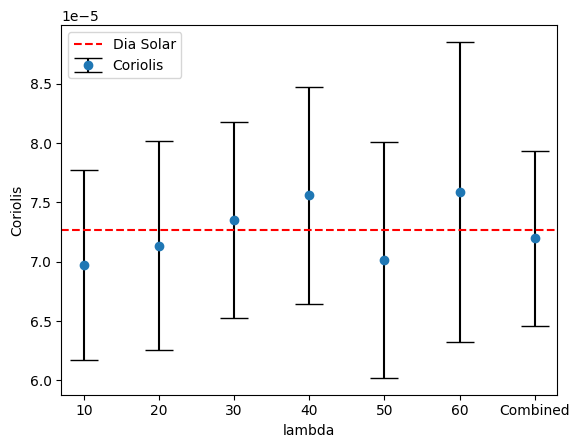

In [ ]:
plt.errorbar(lambda_, Omegas, yerr=errores, fmt='o', capsize=10, ecolor="black",label="Coriolis")
plt.axhline(7.27e-5, color="red",linestyle="--",label= "Dia Solar")
lambdas_values = [10,20,30,40,50,60,"Combined"]
plt.xticks(lambda_,lambdas_values)
plt.xlabel("lambda")
plt.ylabel("Coriolis")
plt.legend()